# 182. EL DATASET DE PELICULAS DE MOVIE LENS 

## SISTEMAS DE RECOMENDACION 

## CARGA DE DATOS DE MOVIE LENS

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/URIEL/Downloads/ml-100k/u.data.csv", sep = "\t", header = None)

In [3]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape #100000 filas de datos. 

(100000, 4)

In [5]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [6]:
df.columns = ["UserID", "ItemID", "Rating", "TimeStamp"]

In [7]:
df.head()

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
 df2 = df[df["UserID"] == 1]

In [9]:
c = df2.Rating.unique().shape[0]
c

5

In [10]:
df2.Rating.unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [11]:
df.Rating.unique().shape[0]

5

In [12]:
df.Rating.unique().tolist()

[3, 1, 2, 4, 5]

## ANALISIS EXPLORATORIO DE LOS ITEMS. 

Para entender como esta distribuido. 

In [13]:
import matplotlib.pyplot as plt 

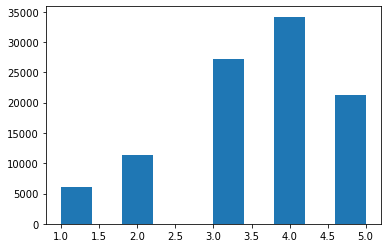

In [14]:
plt.hist(df.Rating)
print()
#nos dara una idea de como se distribuyen las valoraciones. 
#en el grafico vemos que unas 6000 personas han valorado peliculas con una sola estrella. 
#12000 personas han valorado con 2 estrellas. 

(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <a list of 10 Patch objects>)

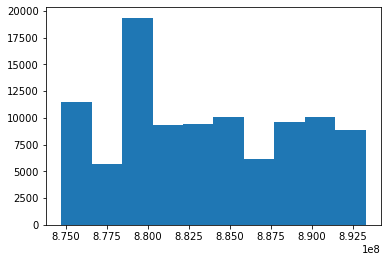

In [15]:
plt.hist(df.TimeStamp)

In [16]:
#filtrado
df.groupby(["Rating"])["UserID"].count()
#agrupado por valoracion contamos cuantos usuarios han hecho cada una de ellas. 
#6110 personas han valorado con una estrella. 
#34174 con 4 estrellas. 

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

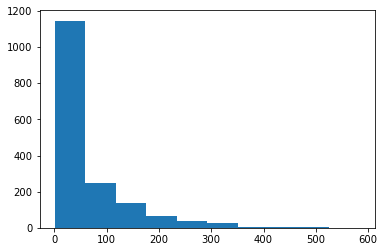

In [17]:
plt.hist(df.groupby(["ItemID"])["ItemID"].count())
#cuanta gente ha visto la pelicula 1. 
#cuanta gente ha visto la pelicula 2, etc. 
#hay peliculas que se han visto mas que otras. 
#el eje x son los identificadores de peliculas
#las peliculas de la 0 a la 50, se lleva la gran mayoria de visualizaciones. 
#habra peliculas que han sido mas vistas, entrando en el sistema de recomendaciones. 

# 184. ESPARSEIDAD DE LOS DATOS 

In [18]:
import numpy as np

## REPRESENTACION EN FORMA MATRICIAL 

Para hacer un sistema de recomendaciones necesitamos tener una matriz de valoraciones, para poder llevar acabo la tarea de crear un sistema de recomendacion dinamico. Para crear esta matriz de valoraciones tenemos que crear una serie de arrays distribuidos en filas y columnas, de modo que  cada fila tenga un usuario y cada una de las columnas sea una pelicula. 

In [19]:
#investigamos el numero de usuarios 
n_users = df.UserID.unique().shape[0]
n_users #numero de usuarios unicos

943

In [20]:
n_items = df.ItemID.unique().shape[0]
n_items #peliculas tenemos. 

1682

In [21]:
#las filas seran usuarios y las columnas peliculas 
ratings = np.zeros((n_users, n_items)) #matriz de ceros. 

In [22]:
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
#todo el df original es transformado en una matriz 2d, matriz de valoraciones.

In [23]:
type(ratings)

numpy.ndarray

In [24]:
ratings.shape

(943, 1682)

In [25]:
ratings 

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [26]:
#para determinar el coeficiente de esparcidad, que procentaje de la matriz no tiene cero. haciendo un bucle. 
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print("Coefienciente de sparseidad : {:4.2f}%".format(sparsity)) #vemos que el 6.30% de esa matriz no esta vacia. 

Coefienciente de sparseidad : 6.30%


In [27]:
ratings[0]

array([5., 3., 4., ..., 0., 0., 0.])

# 185. DIVISION DE ENTRENAMIENTO Y VALIDACION 

Con la matriz de recomendaciones, ahora crearemos conjuntos de entrenamientos y validacion para nuestro algoritmo. distintos sistemas de recomendacion. Usando el paquete scikit learn. 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
rating_train, rating_test = train_test_split(ratings, test_size = 0.3, random_state = 42)

In [30]:
rating_train.shape #nos hemos quedado para entrenar con 660 usuarios y todas las peliculas, para crear nuestro modelo de valoraciones.

(660, 1682)

In [31]:
rating_test.shape #283 usuarios para ofrecerles una recomendacion. 

(283, 1682)

para el filtrado colaborativo basado en usuarios lo que haremos es predecir que un usuario para un item dado
se le ofrecera dicho item si la suma ponderada del resto de usuarios para dicho item es similar a la que ha ofrecido. 
en otras palabras yo tengo un usuario y conozco las peliculas que ha visto, entonces como conozco eso y la valoracion que les ha dado 
yo puedo intentar inferir sus gusto, buscando usuarios que sean similares a el, usuarios que hayan visto peliculas similares. 
para asi usar la distancia y encontrar los usuarios mas conocidos. 

# 186. LA MATRIZ DE SIMILARIDAD ENTRE USUARIOS. 
* Matriz de similaridad entre los usuarios. (distancia del coseno)
* Predecir la valoracion desconocida de un item "i" para un usuario activo "u" basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem. 
* Para decidir la valoracion de un item desconocido, usaremos los K vecinos mas cercanos al usuario para dar la valoracion. 

In [32]:
import numpy as np 
import sklearn

In [33]:
#establecemos la distancia coseno. 
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(rating_train)

In [34]:
sim_matrix.shape #los 660 usuarios contra si mismos. 

(660, 660)

In [35]:
sim_matrix #los 1 es la distancia consigo mismo, estan a uno de similaridad. 
#y asi con todos los demas. 

#hemos encontrado usuarios que se parecen entre si. 
#la matriz es simetrica, tenemos el doble de informacion. 
#paso previo a poder hacer la prediccion del usuario. 
#parecidos en gustos en cuanto a las peliculas que se estan valorando. 

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

Ahora predeciremos cual seria la valoracion de un usuario activo a una pelicula que no ha visto basandonos 
en las que si han visto sus usuarios parecidos. 

# 187. PREDECIR LA VALORACION DE UN ITEM PARA UN USUARIO. 

Los valores  que no conocemos de los items que el usuario no ha tomado, comprado, etc. Se pueden conseguir ponderando la matriz de distancias como de similar un usuario es con otro, con los ratings y normalizando los datos para evitar tener valoraciones que salgan de lo establecido. 

In [38]:
users_predictions = sim_matrix.dot(rating_train) / np.array([np.abs(sim_matrix).sum(axis = 1)]).T

In [40]:
users_predictions
#aqui tenemos la valoracion que aprox cada usuario le daria al item en cuestion. 
#prediccion para el conjunto de entrenamiento. 

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [41]:
#haremos una funcion para comprobar el error cuadratico, para que que tanto sirve este modelo que hemos creado. 
from sklearn.metrics import mean_squared_error

In [45]:
def get_mse(preds, actuals):
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [46]:
get_mse(users_predictions, rating_train)
#tenemos un error cuadratico medio de 7.87. 

7.878218313143215

In [47]:
#hacemos lo mismo en base a las predicciones, usando el conjunto de test. 
get_mse(users_predictions, rating_test) #el error crece solo un poco

8.745164067978985

Por lo tanto concluimos que el metodo que hemos creado, metodo de filtro basandonos en los usuarios, al final es una opcion bastante buena. 

# 188. FILTRANDO CON LOS K NEAREST NEIGHBORS. 

## Filtro colaborativo basado en los KNN

In [48]:
from sklearn.neighbors import NearestNeighbors

In [49]:
#definimos 
k = 10

In [51]:
#iremos jugando con ese valor de k. 
#definimos los vecinos. 
neighbors = NearestNeighbors(k, 'cosine') #usamos la similaridad del coseno. 

In [54]:
neighbors.fit(rating_train) 

NearestNeighbors(n_neighbors=10, radius='cosine')

esto ajustara la matriz de valoraciones con el k = 10 vecinos mas cercanos. 
calculemos el top 10 de usuarios para cada uno de nuestros usuarios y sus valores de similaridad, que sera la distancia #entre cada par de los usuarios mas parecidos a cada uno dado.

In [56]:
top_k_distances, top_k_users =  neighbors.kneighbors(rating_train, return_distance = True)

In [58]:
top_k_distances.shape
#Tendra 660 usuarios y el top ten de distancias.

(660, 10)

In [59]:
top_k_distances[0] #estas son distancias. 

array([ 0.        , 41.71330723, 43.3474336 , 45.04442252, 45.04442252,
       45.18849411, 45.19955752, 45.254834  , 45.35416188, 45.39823785])

In [60]:
top_k_users[0] #quienes son esos k usuarios. 

array([  0, 211,  16, 428, 583, 279, 149, 188, 196, 424], dtype=int64)

In [70]:
users_predicts_k = np.zeros(rating_train.shape)
for i in range(rating_train.shape[0]):
    users_predicts_k[i,:] = top_k_distances[i].T.dot(rating_train[top_k_users][i]) /np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [72]:
users_predicts_k.shape 
#tenemos 660 filas y 1682 columnas. 
#para cada usuario tenemos la prediccion de las peliculas. 


(660, 1682)

In [73]:
users_predicts_k

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66502836, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.31240293, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [74]:
get_mse(users_predicts_k, rating_train)

8.229125487414281

In [75]:
get_mse(users_predicts_k, rating_test)

11.245929371299852